In [1]:
import pandas as pd
from pycaret.regression import *
import numpy as np
import re
from collections import Counter
from sklearn.model_selection import  train_test_split
from sklearn import feature_selection

In [2]:
df  = pd.read_csv('./train_features.csv')
label = pd.read_csv('./train_labels.csv')

In [3]:
features_03 = ['uid','age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03', 'glob_hlth_03', 'adl_dress_03', 
'adl_walk_03', 'adl_bath_03', 'adl_eat_03', 'adl_bed_03', 'adl_toilet_03', 'n_adl_03', 'iadl_money_03', 'iadl_meds_03', 
'iadl_shop_03', 'iadl_meals_03', 'n_iadl_03', 'depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03', 'enjoy_03', 
'sad_03', 'tired_03', 'energetic_03', 'n_depr_03', 'cesd_depressed_03', 'hypertension_03', 'diabetes_03', 'resp_ill_03', 
'arthritis_03', 'hrt_attack_03', 'stroke_03', 'cancer_03', 'n_illnesses_03', 'bmi_03', 'exer_3xwk_03', 'alcohol_03', 
'tobacco_03', 'test_chol_03', 'test_tuber_03', 'test_diab_03', 'test_pres_03', 'hosp_03', 'visit_med_03', 'out_proc_03', 
'visit_dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03', 'insured_03', 
'decis_famil_03', 'decis_personal_03', 'employment_03', 'sgender_03', 'rjob_hrswk_03', 'rjlocc_m_03', 'rjob_end_03', 
'rjobend_reason_03', 'rearnings_03', 'searnings_03', 'hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03', 
'hinc_cap_03', 'rinc_pension_03', 'sinc_pension_03', 'rrelgimp_03']

In [4]:
features_12 =['uid','age_12', 'urban_12', 'married_12', 'n_mar_12', 'edu_gru_12', 'n_living_child_12', 'migration_12', 'glob_hlth_12', 
'adl_dress_12', 'adl_walk_12', 'adl_bath_12', 'adl_eat_12', 'adl_bed_12', 'adl_toilet_12', 'n_adl_12', 'iadl_money_12', 
'iadl_meds_12', 'iadl_shop_12', 'iadl_meals_12', 'n_iadl_12', 'depressed_12', 'hard_12', 'restless_12', 'happy_12', 
'lonely_12', 'enjoy_12', 'sad_12', 'tired_12', 'energetic_12', 'n_depr_12', 'cesd_depressed_12', 'hypertension_12', 
'diabetes_12', 'resp_ill_12', 'arthritis_12', 'hrt_attack_12', 'stroke_12', 'cancer_12', 'n_illnesses_12', 'bmi_12', 
'exer_3xwk_12', 'alcohol_12', 'tobacco_12', 'test_chol_12', 'test_tuber_12', 'test_diab_12', 'test_pres_12', 'hosp_12', 
'visit_med_12', 'out_proc_12', 'visit_dental_12', 'imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 
'insur_other_12', 'seg_pop_12', 'insured_12', 'decis_famil_12', 'decis_personal_12', 'employment_12', 'vax_flu_12', 
'vax_pneu_12', 'care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12', 'reads_12', 
'games_12', 'table_games_12', 'comms_tel_comp_12', 'act_mant_12', 'tv_12', 'sewing_12', 'satis_ideal_12', 'satis_excel_12', 
'satis_fine_12', 'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 'sgender_12', 'rjob_hrswk_12', 'rjlocc_m_12', 
'rjob_end_12', 'rjobend_reason_12', 'rearnings_12', 'searnings_12', 'hincome_12', 'hinc_business_12', 'hinc_rent_12', 
'hinc_assets_12', 'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 
'rrelgwk_12', 'a16a_12', 'a21_12', 'a22_12', 'a33b_12', 'a34_12', 'j11_12']


In [5]:
str_features = ["age_03", "age_12", "urban_03", "urban_12", "married_03", "married_12", "edu_gru_03", "edu_gru_12",
    "n_living_child_03", "n_living_child_12", "glob_hlth_03", "glob_hlth_12", "bmi_03", "bmi_12", "decis_famil_03",
    "decis_famil_12", "decis_personal_03", "decis_personal_12", "employment_03", "employment_12", "satis_ideal_12",
    "satis_excel_12", "satis_fine_12", "cosas_imp_12", "wouldnt_change_12", "memory_12", "ragender", "rameduc_m",
    "rafeduc_m", "sgender_03", "sgender_12", 
                # "rjlocc_m_03", "rjlocc_m_12", "rjobend_reason_03", "rjobend_reason_12",                
    "rrelgimp_03", "rrelgimp_12", "rrfcntx_m_12", "rsocact_m_12", "rrelgwk_12", "a22_12", "a33b_12", "a34_12", "j11_12"]

In [6]:
label_2016 = label[label['year']==2016].set_index('uid')
label_2021 = label[label['year']==2021].set_index('uid')

In [7]:
df_03 = df[features_03]
df_12 = df[features_12]

In [8]:
df_dropna_03= df_03.drop(['rjlocc_m_03','rjob_end_03','rjobend_reason_03'],axis=1).dropna(subset=['age_03']).set_index('uid')
df_dropna_12= df_12.drop(['rjlocc_m_12','rjob_end_12','rjobend_reason_12'],axis=1).dropna(subset=['age_12']).set_index('uid')

In [14]:
for col in df_dropna_03.columns:
    print(col)

age_03
urban_03
married_03
n_mar_03
edu_gru_03
n_living_child_03
migration_03
glob_hlth_03
adl_dress_03
adl_walk_03
adl_bath_03
adl_eat_03
adl_bed_03
adl_toilet_03
n_adl_03
iadl_money_03
iadl_meds_03
iadl_shop_03
iadl_meals_03
n_iadl_03
depressed_03
hard_03
restless_03
happy_03
lonely_03
enjoy_03
sad_03
tired_03
energetic_03
n_depr_03
cesd_depressed_03
hypertension_03
diabetes_03
resp_ill_03
arthritis_03
hrt_attack_03
stroke_03
cancer_03
n_illnesses_03
bmi_03
exer_3xwk_03
alcohol_03
tobacco_03
test_chol_03
test_tuber_03
test_diab_03
test_pres_03
hosp_03
visit_med_03
out_proc_03
visit_dental_03
imss_03
issste_03
pem_def_mar_03
insur_private_03
insur_other_03
insured_03
decis_famil_03
decis_personal_03
employment_03
sgender_03
rjob_hrswk_03
rearnings_03
searnings_03
hincome_03
hinc_business_03
hinc_rent_03
hinc_assets_03
hinc_cap_03
rinc_pension_03
sinc_pension_03
rrelgimp_03


<Axes: >

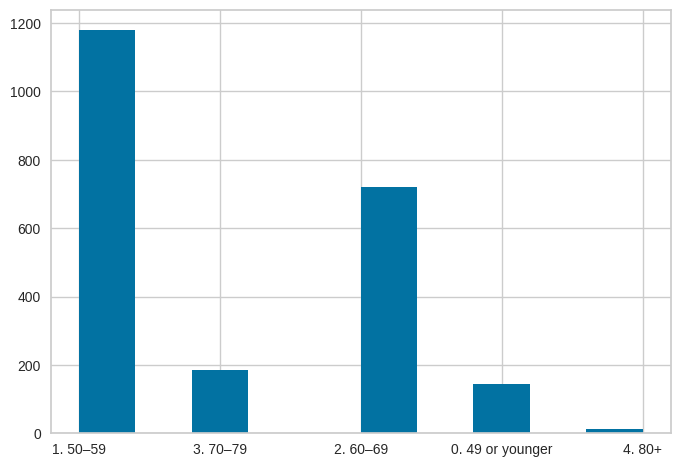

In [17]:
df_dropna_03.age_03.hist()

<Axes: >

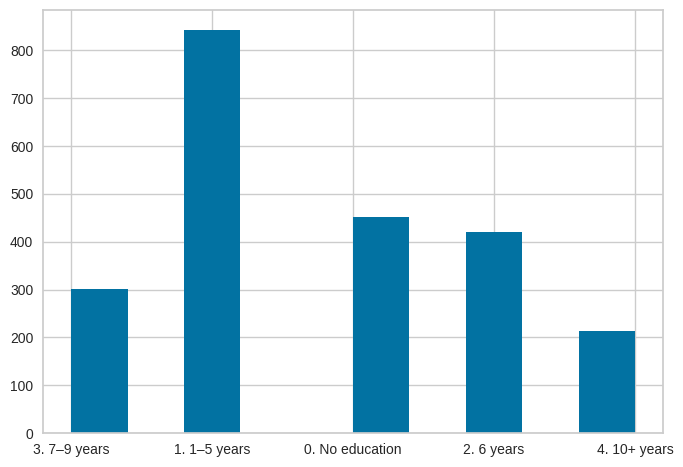

In [18]:
df_dropna_03.edu_gru_03.hist()

### Predict 2021 result with 2012 survey
- Pycaret will preprocess categorical feature
- Consider the order of ordinal categorical feature

In [9]:
data_dropna_12_21 = df_dropna_12.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)
for fea in str_features:
    if fea in data_dropna_12_21.columns:
        print(fea)
        print(sorted(list(Counter(data_dropna_12_21[fea].dropna()).keys())))

age_12
['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+']
urban_12
['0. <100,000', '1. 100,000+']
married_12
['1. Married or in civil union', '2. Separated or divorced', '3. Widowed', '4. Single']
edu_gru_12
['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years']
n_living_child_12
['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+']
glob_hlth_12
['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor']
bmi_12
['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese']
decis_famil_12
['1. Respondent', '2. Approximately equal weight', '3. Spouse']
decis_personal_12
['1. A lot', '2. A little', '3. None']
employment_12
['1. Currently Working', '2. Currently looking for work', '3. Dedicated to household chores', '4. Retired, incapacitated, or does not work']
satis_ideal_12
['1. Agrees', '2. Neither agrees nor disagrees', '3. Disagrees']
satis_excel_12
['1. Agrees', '2. Neither agrees nor disagrees',

In [10]:
data_dropna_12_21 = df_dropna_12.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)
s=setup(data_dropna_12_21, target = 'composite_score',fold=5, index=False,session_id =1,ordinal_features = 
        {'age_12' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_12':['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_12':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_12':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'memory_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'rrelgimp_12':['1.very important', '2.somewhat important', '3.not important'],
         'rrfcntx_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
         'rsocact_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
                  })
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1566, 103)"
4,Transformed data shape,"(1566, 174)"
5,Transformed train set shape,"(1096, 174)"
6,Transformed test set shape,"(470, 174)"
7,Ordinal features,9
8,Numeric features,77
9,Categorical features,25


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,33.8433,1810.5413,42.5289,0.5891,0.4084,0.3808,0.3740
lasso,Lasso Regression,34.0269,1846.8723,42.9357,0.5809,0.4243,0.4090,0.3320
llar,Lasso Least Angle Regression,34.0237,1847.8264,42.9475,0.5807,0.4241,0.4084,0.3000
br,Bayesian Ridge,34.5292,1866.8475,43.1791,0.5765,0.4269,0.3977,0.3000
rf,Random Forest Regressor,34.8013,1947.2873,44.1010,0.5577,0.4267,0.4018,0.3640
ridge,Ridge Regression,35.5832,1994.9689,44.6253,0.5468,0.4362,0.3959,0.3180
ada,AdaBoost Regressor,36.3561,2083.2367,45.6063,0.5270,0.4383,0.4168,0.3540
omp,Orthogonal Matching Pursuit,37.0939,2213.9321,46.9711,0.4981,0.4433,0.4318,0.3220
en,Elastic Net,39.6736,2463.1795,49.6165,0.4421,0.4823,0.5038,0.3360
et,Extra Trees Regressor,42.4590,2899.3071,53.7870,0.3417,0.5012,0.4556,0.3600


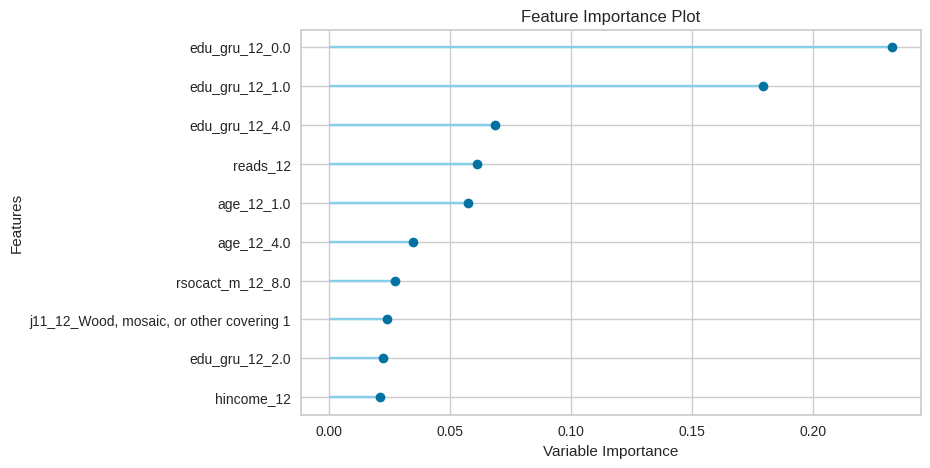

In [11]:
plot_model(bests[0], plot = 'feature')

### Predict 2016 result with 2012 survey
- Pycaret will preprocess categorical feature
- Consider the order of ordinal categorical feature

In [12]:
data_dropna_12_16 = df_dropna_12.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)
s=setup(data_dropna_12_16, target = 'composite_score',fold=5, index=False,session_id =1,ordinal_features = 
        {'age_12' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_12':['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_12':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_12':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'memory_12':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'rrelgimp_12':['1.very important', '2.somewhat important', '3.not important'],
         'rrfcntx_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
         'rsocact_m_12':['1.Almost every day', '2.4 or more times a week', '3.2 or 3 times a week', '4.Once a week', '5.4 or more times a month', '6.2 or 3 times a month', '7.Once a month', '8.Almost Never, sporadic', '9.Never'],
                  })
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1566, 103)"
4,Transformed data shape,"(1566, 174)"
5,Transformed train set shape,"(1096, 174)"
6,Transformed test set shape,"(470, 174)"
7,Ordinal features,9
8,Numeric features,77
9,Categorical features,25


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,33.8433,1810.5413,42.5289,0.5891,0.4084,0.3808,0.1480
lasso,Lasso Regression,34.0269,1846.8723,42.9357,0.5809,0.4243,0.4090,0.1020
llar,Lasso Least Angle Regression,34.0237,1847.8264,42.9475,0.5807,0.4241,0.4084,0.0860
br,Bayesian Ridge,34.5292,1866.8475,43.1791,0.5765,0.4269,0.3977,0.0900
rf,Random Forest Regressor,34.8013,1947.2873,44.1010,0.5577,0.4267,0.4018,0.1400
ridge,Ridge Regression,35.5832,1994.9689,44.6253,0.5468,0.4362,0.3959,0.0920
ada,AdaBoost Regressor,36.3561,2083.2367,45.6063,0.5270,0.4383,0.4168,0.1300
omp,Orthogonal Matching Pursuit,37.0939,2213.9321,46.9711,0.4981,0.4433,0.4318,0.0820
en,Elastic Net,39.6736,2463.1795,49.6165,0.4421,0.4823,0.5038,0.1060
et,Extra Trees Regressor,42.4590,2899.3071,53.7870,0.3417,0.5012,0.4556,0.1440


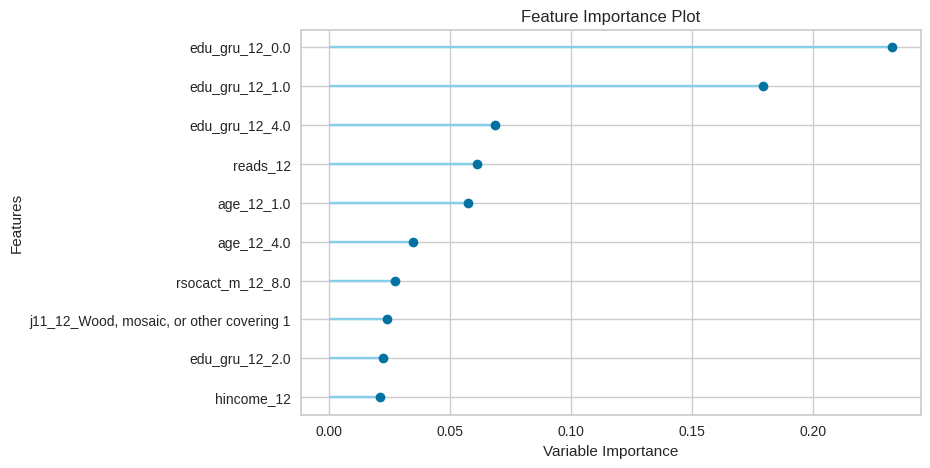

In [13]:
plot_model(bests[0], plot = 'feature')

### Predict 2016 result with 2003 survey
- Pycaret will preprocess categorical feature
- Consider the order of ordinal categorical feature

In [14]:
data_dropna_03_16 = df_dropna_03.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)
for fea in str_features:
    if fea in data_dropna_03_16.columns:
        print(fea)
        print(sorted(list(Counter(data_dropna_03_16[fea].dropna()).keys())))

age_03
['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+']
urban_03
['0. <100,000', '1. 100,000+']
married_03
['1. Married or in civil union', '2. Separated or divorced', '3. Widowed', '4. Single']
edu_gru_03
['0. No education', '1. 1–5 years', '2. 6 years', '3. 7–9 years', '4. 10+ years']
n_living_child_03
['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+']
glob_hlth_03
['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor']
bmi_03
['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese']
decis_famil_03
['1. Respondent', '2. Approximately equal weight', '3. Spouse']
decis_personal_03
[1.0, 2.0, 3.0]
employment_03
['1. Currently Working', '2. Currently looking for work', '3. Dedicated to household chores', '4. Retired, incapacitated, or does not work']
sgender_03
['1.Man', '2.Woman']
rrelgimp_03
['1.very important', '2.somewhat important', '3.not important']


In [15]:
s=setup(data_dropna_03_16, target = 'composite_score',fold=5, index=False,session_id =1,ordinal_features = 
        {'age_03' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_03':['0. No education', '1. 1–5 years','2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_03':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_03':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_03':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'rrelgimp_03':['1.very important', '2.somewhat important', '3.not important']
         })
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1015, 73)"
4,Transformed data shape,"(1015, 103)"
5,Transformed train set shape,"(710, 103)"
6,Transformed test set shape,"(305, 103)"
7,Ordinal features,6
8,Numeric features,61
9,Categorical features,11


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,34.1799,1921.8062,43.8271,0.5273,0.4719,0.4656,0.0520
llar,Lasso Least Angle Regression,34.2453,1926.9258,43.8854,0.5260,0.4722,0.4662,0.0540
rf,Random Forest Regressor,34.5886,1937.2410,43.9711,0.5225,0.4768,0.4714,0.1000
br,Bayesian Ridge,34.9744,1980.7791,44.4805,0.5130,0.4744,0.4604,0.0500
gbr,Gradient Boosting Regressor,34.3529,1983.0240,44.4888,0.5118,0.4842,0.4677,0.0780
ridge,Ridge Regression,35.6971,2072.2486,45.4865,0.4901,0.4972,0.4490,0.0480
ada,AdaBoost Regressor,37.5382,2231.4306,47.2291,0.4508,0.4829,0.4754,0.0700
et,Extra Trees Regressor,40.1417,2622.9782,51.1847,0.3530,0.5131,0.4818,0.0840
en,Elastic Net,42.2272,2911.1405,53.9245,0.2842,0.5383,0.5901,0.0540
dt,Decision Tree Regressor,46.7930,3494.9310,59.0217,0.1421,0.6285,0.5392,0.0500


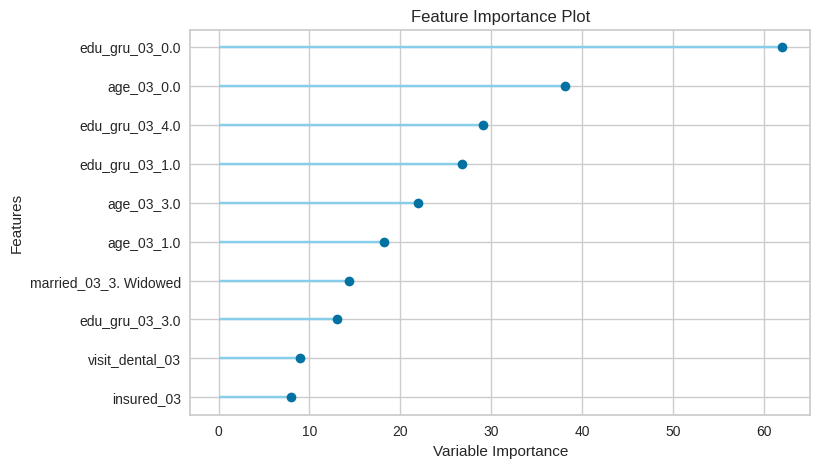

In [16]:
plot_model(bests[0], plot = 'feature')

### Predict 2021 result with 2003 survey
- Pycaret will preprocess categorical feature
- Consider the order of ordinal categorical feature

In [17]:
data_dropna_03_21 = df_dropna_03.merge(label_2021, left_index=True,right_index=True).drop(['year'], axis=1)
s=setup(data_dropna_03_21, target = 'composite_score',fold=5, index=False,session_id =1,ordinal_features = 
        {'age_03' : ['0. 49 or younger', '1. 50–59', '2. 60–69', '3. 70–79', '4. 80+'], 
         'edu_gru_03':['0. No education', '1. 1–5 years','2. 6 years', '3. 7–9 years', '4. 10+ years'],
         'n_living_child_03':['0. No children', '1. 1 or 2', '2. 3 or 4', '3. 5 or 6', '4. 7+'],
         'glob_hlth_03':['1. Excellent', '2. Very good', '3. Good', '4. Fair', '5. Poor'],
         'bmi_03':['1. Underweight', '2. Normal weight', '3. Overweight', '4. Obese', '5. Morbidly obese'],
         'rrelgimp_03':['1.very important', '2.somewhat important', '3.not important']
         })
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1872, 73)"
4,Transformed data shape,"(1872, 103)"
5,Transformed train set shape,"(1310, 103)"
6,Transformed test set shape,"(562, 103)"
7,Ordinal features,6
8,Numeric features,61
9,Categorical features,11


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,33.6083,1849.7747,42.9496,0.4335,0.3990,0.3694,0.0980
lasso,Lasso Regression,34.0092,1881.1928,43.3160,0.4247,0.4029,0.3779,0.0580
llar,Lasso Least Angle Regression,34.0249,1883.1840,43.3379,0.4241,0.4030,0.3781,0.0500
br,Bayesian Ridge,33.9236,1886.1411,43.3692,0.4231,0.4014,0.3712,0.0500
ridge,Ridge Regression,34.3177,1931.4963,43.8932,0.4091,0.4049,0.3711,0.0460
rf,Random Forest Regressor,34.1395,1967.0167,44.2965,0.3967,0.4086,0.3798,0.1160
ada,AdaBoost Regressor,36.2400,2118.6339,45.9764,0.3507,0.4159,0.3878,0.0820
en,Elastic Net,38.3748,2321.4198,48.1415,0.2890,0.4398,0.4312,0.0560
et,Extra Trees Regressor,39.0959,2502.8540,49.9583,0.2332,0.4494,0.4174,0.1040
omp,Orthogonal Matching Pursuit,43.0395,2843.8803,53.2959,0.1282,0.4732,0.4789,0.0480


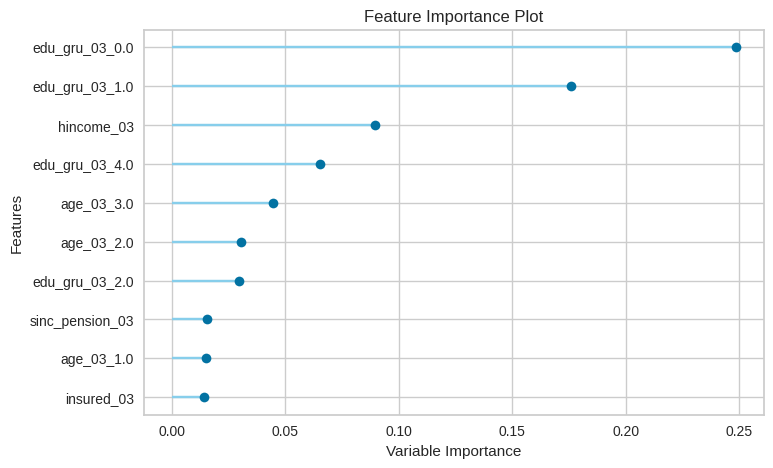

In [18]:
plot_model(bests[0], plot = 'feature')

#### Preprocess categorical feature with One-Hot Encoding and fill NA with mode

In [19]:
#the chi2 function in sklearn.feature_selection requires all values in X to be non-negative
# Replace negative values in X with 0 or another non-negative value if appropriate
def Chi(data_03_16):
    y = data_03_16['composite_score']
    X =data_03_16.drop(['composite_score'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X = X.clip(lower=0)
    z= feature_selection.chi2(X, y)
    fs = []
    for idx, x in enumerate(X.columns):
        fs.append({'name':x,'chi2':z[0][idx], 'p-val':z[1][idx]})
    fs.sort(key=lambda x:-x['chi2'])
    print(fs[:5])
    chi_features=[]
    for x in fs:
        if x['p-val']<0.05:
            chi_features.append(x['name']) 
    data_03_16_selected =  data_03_16[list(pycaret_features)+['composite_score']]
    s=setup(data_03_16_selected, target = 'composite_score',fold=5, index=False,session_id =1,preprocess=False,feature_selection=True )
    bests = compare_models(exclude=['lightgbm'],n_select=20)
    return bests

In [9]:
# Filling missing values with the most frequent value in each column
df_fillna_03 = df_dropna_03.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" or x.dtype == "float" or x.dtype == "int" else x)
df_fillna_12 = df_dropna_12.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" or x.dtype == "float" or x.dtype == "int" else x)
df_encoded_03 = pd.get_dummies(df_fillna_03, drop_first=True, dtype=float)  # Use drop_first=True to avoid multicollinearity if needed
df_encoded_12 = pd.get_dummies(df_fillna_12, drop_first=True, dtype=float)  # Use drop_first=True to avoid multicollinearity if needed
data_03= pd.concat([df_fillna_03,df_encoded_03], axis=1).drop(list(set(str_features)&set(features_03)),axis=1)
data_12= pd.concat([df_fillna_12,df_encoded_12], axis=1).drop(list(set(str_features)&set(features_12)),axis=1)
data_03 = data_03.loc[:, ~data_03.T.duplicated()]
data_12 = data_12.loc[:, ~data_12.T.duplicated()]
data_03_16 = data_03.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)
data_03_21 = data_03.merge(label_2021, left_index=True,right_index=True).drop(['year'], axis=1)
data_12_16 = data_12.merge(label_2016, left_index=True,right_index=True).drop(['year'], axis=1)
data_12_21 = data_12.merge(label_2021, left_index=True,right_index=True).drop(['year'], axis=1)

In [10]:
data_03_16.head()

,n_mar_03,migration_03,adl_dress_03,adl_walk_03,adl_bath_03,adl_eat_03,adl_bed_03,adl_toilet_03,n_adl_03,iadl_money_03,...,bmi_03_5. Morbidly obese,decis_famil_03_2. Approximately equal weight,decis_famil_03_3. Spouse,employment_03_2. Currently looking for work,employment_03_3. Dedicated to household chores,"employment_03_4. Retired, incapacitated, or does not work",sgender_03_2.Woman,rrelgimp_03_2.somewhat important,rrelgimp_03_3.not important,composite_score
uid,,,,,,,,,,,,,,,,,,,,,
acmh,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13
addk,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38
aehw,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,87
aete,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,203
afls,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17


##### Predict 2016 result with 2003 survey

In [21]:
s=setup(data_03_16, target = 'composite_score',fold=5,preprocess=False, index=False,session_id =1 )
bests = compare_models(exclude=['lightgbm'],n_select=5)

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1015, 93)"
4,Transformed data shape,"(1015, 93)"
5,Transformed train set shape,"(710, 93)"
6,Transformed test set shape,"(305, 93)"
7,Numeric features,92


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,35.5431,2018.5568,44.9084,0.5028,0.4803,0.4807,0.0600
lasso,Lasso Regression,35.7713,2084.1746,45.6459,0.4875,0.4877,0.4929,0.0140
gbr,Gradient Boosting Regressor,35.2190,2090.5897,45.6491,0.4855,0.5021,0.4910,0.0400
ridge,Ridge Regression,35.8749,2091.6345,45.7128,0.4852,0.4839,0.4572,0.0100
llar,Lasso Least Angle Regression,36.7376,2168.9859,46.5484,0.4649,0.4949,0.5057,0.0140
lr,Linear Regression,36.6300,2188.7701,46.7508,0.4606,0.4893,0.4659,0.0120
ada,AdaBoost Regressor,39.2065,2440.1924,49.3800,0.3992,0.5024,0.5053,0.0340
et,Extra Trees Regressor,40.5109,2690.8287,51.8090,0.3387,0.5227,0.4838,0.0500
en,Elastic Net,43.9555,3089.6504,55.5584,0.2413,0.5521,0.6141,0.0160
br,Bayesian Ridge,44.6471,3295.6363,56.9598,0.1914,0.5701,0.6198,0.0120


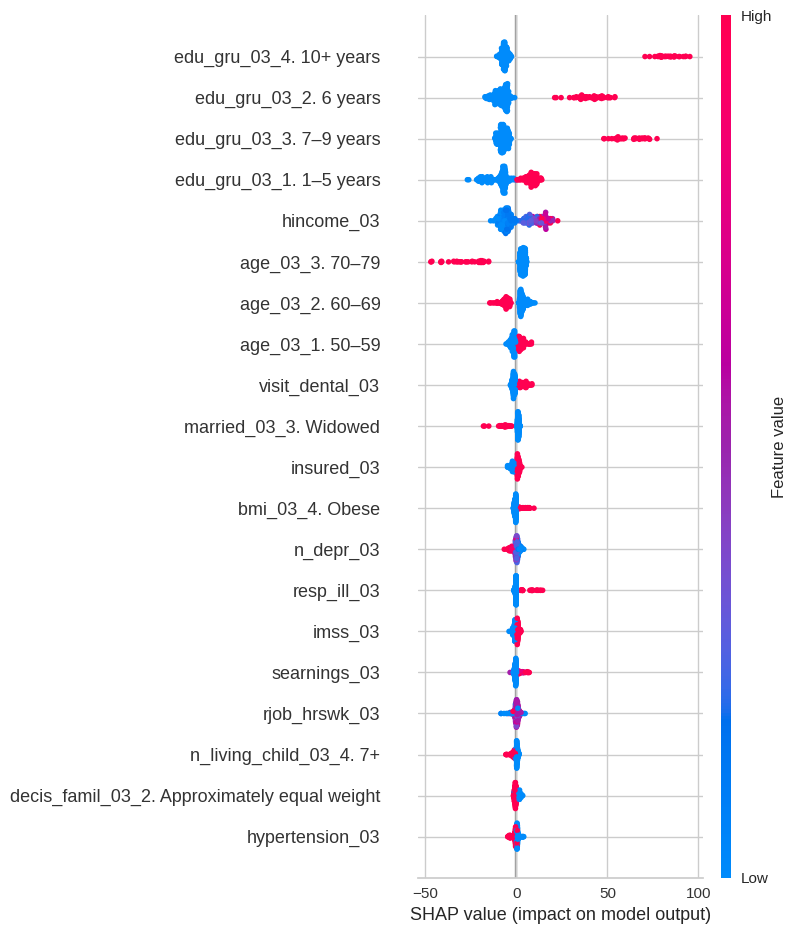

RandomForestRegressor(n_jobs=-1, random_state=1)


In [22]:
shapfeatures = []
for best_model in bests:
    try:
        interpret_model(best_model)
        print(best_model)
        print('============================================')
    except:
        continue

RandomForestRegressor(n_jobs=-1, random_state=1)


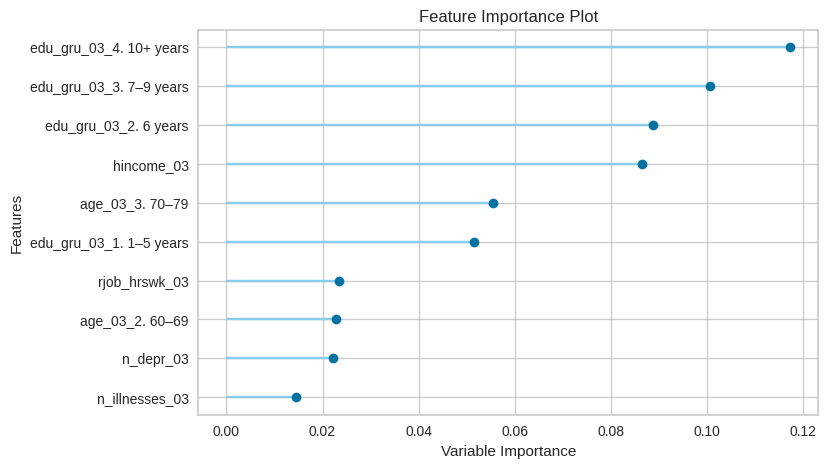

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'edu_gru_03_1. 1–5 years', 'rjob_hrswk_03', 'age_03_2. 60–69',
       'n_depr_03', 'n_illnesses_03', 'married_03_3. Widowed',
       'age_03_1. 50–59', 'searnings_03', 'visit_dental_03', 'rearnings_03',
       'rinc_pension_03', 'sinc_pension_03', 'n_living_child_03_4. 7+',
       'hinc_cap_03', 'insured_03'],
      dtype='object') 

Lasso(random_state=1)


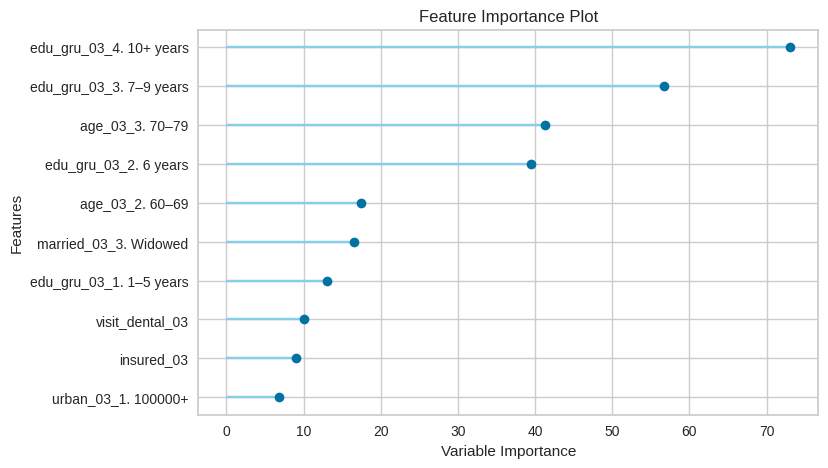

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'edu_gru_03_1. 1–5 years', 'rjob_hrswk_03', 'age_03_2. 60–69',
       'n_depr_03', 'n_illnesses_03', 'married_03_3. Widowed',
       'age_03_1. 50–59', 'searnings_03', 'visit_dental_03', 'rearnings_03',
       'rinc_pension_03', 'sinc_pension_03', 'n_living_child_03_4. 7+',
       'hinc_cap_03', 'insured_03'],
      dtype='object') 

GradientBoostingRegressor(random_state=1)


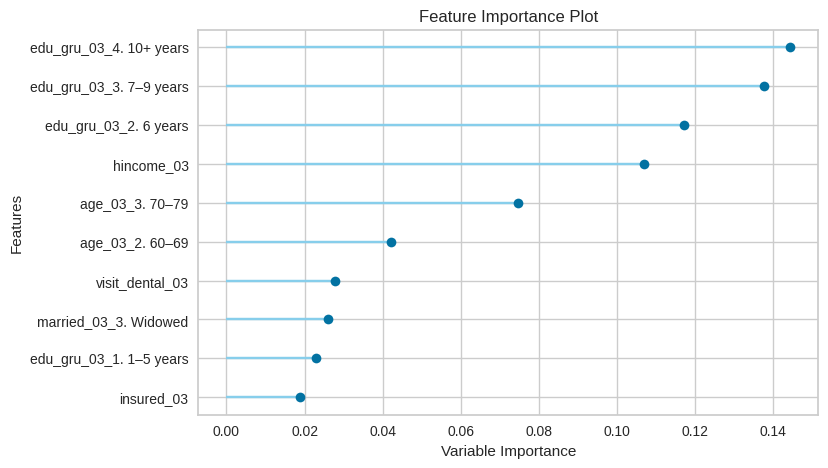

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'edu_gru_03_1. 1–5 years', 'rjob_hrswk_03', 'age_03_2. 60–69',
       'n_depr_03', 'n_illnesses_03', 'married_03_3. Widowed',
       'age_03_1. 50–59', 'searnings_03', 'visit_dental_03', 'rearnings_03',
       'rinc_pension_03', 'sinc_pension_03', 'n_living_child_03_4. 7+',
       'hinc_cap_03', 'insured_03'],
      dtype='object') 

Ridge(random_state=1)


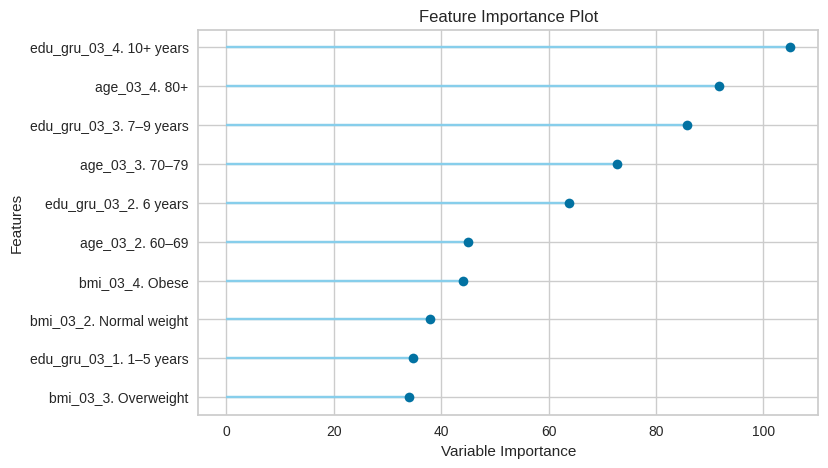

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'edu_gru_03_1. 1–5 years', 'rjob_hrswk_03', 'age_03_2. 60–69',
       'n_depr_03', 'n_illnesses_03', 'married_03_3. Widowed',
       'age_03_1. 50–59', 'searnings_03', 'visit_dental_03', 'rearnings_03',
       'rinc_pension_03', 'sinc_pension_03', 'n_living_child_03_4. 7+',
       'hinc_cap_03', 'insured_03'],
      dtype='object') 

LassoLars(random_state=1)


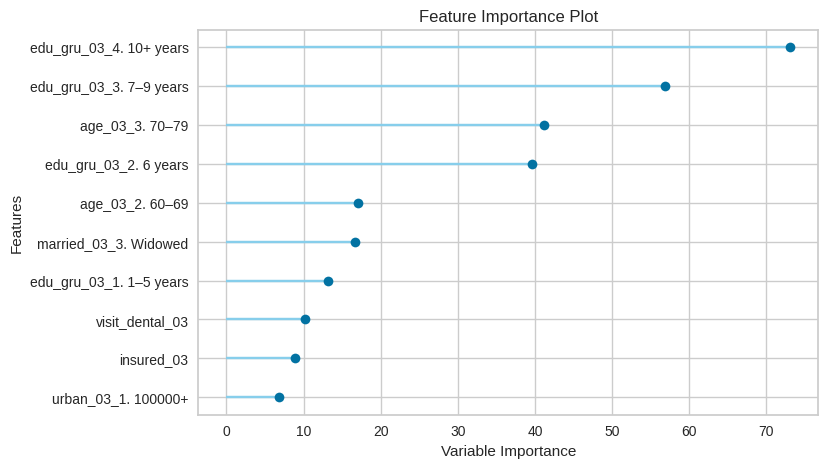

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'edu_gru_03_1. 1–5 years', 'rjob_hrswk_03', 'age_03_2. 60–69',
       'n_depr_03', 'n_illnesses_03', 'married_03_3. Widowed',
       'age_03_1. 50–59', 'searnings_03', 'visit_dental_03', 'rearnings_03',
       'rinc_pension_03', 'sinc_pension_03', 'n_living_child_03_4. 7+',
       'hinc_cap_03', 'insured_03'],
      dtype='object') 

{'insured_03', 'age_03_2. 60–69', 'married_03_3. Widowed', 'hincome_03', 'n_depr_03', 'rjob_hrswk_03', 'sinc_pension_03', 'edu_gru_03_1. 1–5 years', 'age_03_1. 50–59', 'rinc_pension_03', 'visit_dental_03', 'edu_gru_03_3. 7–9 years', 'n_living_child_03_4. 7+', 'searnings_03', 'n_illnesses_03', 'edu_gru_03_4. 10+ years', 'rearnings_03', 'age_03_3. 70–79', 'hinc_cap_03', 'edu_gru_03_2. 6 years'}


In [23]:
# plot feature importance
selectfeatures = []
for best in bests:
    try:
        print(best)
        plot_model(best, plot = 'feature')
        feature_importance = get_config('X_train').columns[bests[0].feature_importances_.argsort()[::-1]]
        print("Top features by importance:", feature_importance[:20],'\n')  # Adjust the number to display top N feature
        selectfeatures.append(feature_importance[:20])
    except:
        continue   
pycaret_features= set()
for i in selectfeatures:
    pycaret_features|= set(i)
print(pycaret_features)

##### Chi-square feature and P-value selection

In [24]:
Chi(data_03_16)

[{'name': 'hincome_03', 'chi2': 99054931.1645096, 'p-val': 0.0}, {'name': 'hinc_business_03', 'chi2': 98545828.83155286, 'p-val': 0.0}, {'name': 'hinc_cap_03', 'chi2': 92212804.25676449, 'p-val': 0.0}, {'name': 'rinc_pension_03', 'chi2': 53972593.950640716, 'p-val': 0.0}, {'name': 'searnings_03', 'chi2': 49470423.8084646, 'p-val': 0.0}]


,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1015, 21)"
4,Transformed data shape,"(1015, 21)"
5,Transformed train set shape,"(710, 21)"
6,Transformed test set shape,"(305, 21)"
7,Numeric features,20


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,34.0041,1901.2023,43.5832,0.5320,0.4664,0.4467,0.0100
ridge,Ridge Regression,34.0352,1903.0139,43.6065,0.5316,0.4676,0.4512,0.0100
br,Bayesian Ridge,34.1023,1908.4528,43.6705,0.5303,0.4680,0.4520,0.0120
llar,Lasso Least Angle Regression,35.8395,2082.4671,45.6266,0.4879,0.4897,0.4973,0.0100
lasso,Lasso Regression,35.8784,2086.6700,45.6718,0.4870,0.4900,0.4979,0.0100
gbr,Gradient Boosting Regressor,35.8678,2150.9262,46.3677,0.4704,0.4917,0.4930,0.0280
rf,Random Forest Regressor,37.4775,2281.6288,47.7438,0.4374,0.4981,0.5051,0.0760
ada,AdaBoost Regressor,40.0720,2529.0994,50.2753,0.3783,0.5083,0.5166,0.0260
et,Extra Trees Regressor,41.0284,2770.5924,52.5706,0.3153,0.5491,0.5350,0.0560
en,Elastic Net,44.5274,3176.1371,56.3274,0.2202,0.5577,0.6261,0.0100


[LinearRegression(n_jobs=-1),
 Ridge(random_state=1),
 BayesianRidge(),
 LassoLars(random_state=1),
 Lasso(random_state=1),
 GradientBoostingRegressor(random_state=1),
 RandomForestRegressor(n_jobs=-1, random_state=1),
 AdaBoostRegressor(random_state=1),
 ExtraTreesRegressor(n_jobs=-1, random_state=1),
 ElasticNet(random_state=1),
 KNeighborsRegressor(n_jobs=-1),
 DummyRegressor(),
 OrthogonalMatchingPursuit(),
 DecisionTreeRegressor(random_state=1),
 HuberRegressor(),
 PassiveAggressiveRegressor(random_state=1),
 Lars(random_state=1)]

##### Predict 2021 result with 2003 survey

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1872, 93)"
4,Transformed data shape,"(1872, 93)"
5,Transformed train set shape,"(1310, 93)"
6,Transformed test set shape,"(562, 93)"
7,Numeric features,92


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,34.1336,1916.9614,43.7168,0.4133,0.4041,0.3765,0.0580
ridge,Ridge Regression,34.5308,1951.2734,44.1098,0.4035,0.4066,0.3746,0.0120
lasso,Lasso Regression,35.0025,1975.2766,44.3896,0.3956,0.4155,0.3946,0.0180
rf,Random Forest Regressor,34.7140,2008.2598,44.7825,0.3831,0.4100,0.3814,0.0580
llar,Lasso Least Angle Regression,35.9616,2073.9734,45.3896,0.3689,0.4222,0.4043,0.0140
lr,Linear Regression,36.0126,2135.1561,46.0790,0.3470,0.4298,0.3835,0.0140
ada,AdaBoost Regressor,37.4805,2257.6551,47.4803,0.3079,0.4289,0.4024,0.0420
br,Bayesian Ridge,37.1719,2271.6186,47.5910,0.2989,0.4463,0.3972,0.0140
en,Elastic Net,39.4971,2442.6007,49.3866,0.2515,0.4490,0.4442,0.0180
et,Extra Trees Regressor,41.2911,2789.2575,52.6928,0.1493,0.4704,0.4275,0.0580


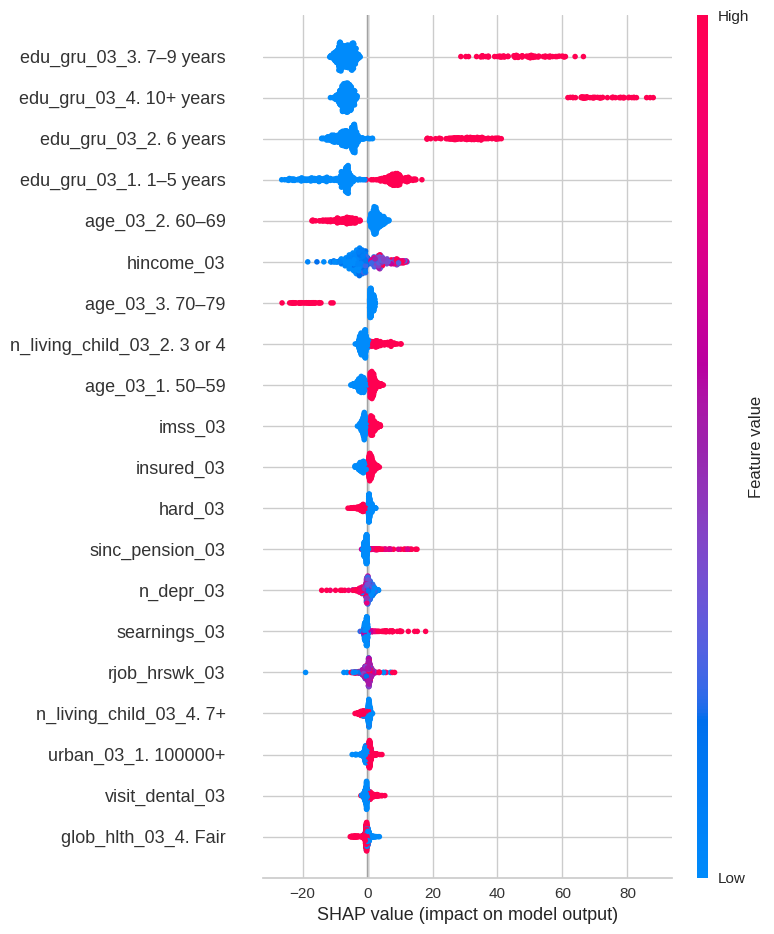

RandomForestRegressor(n_jobs=-1, random_state=1)
GradientBoostingRegressor(random_state=1)


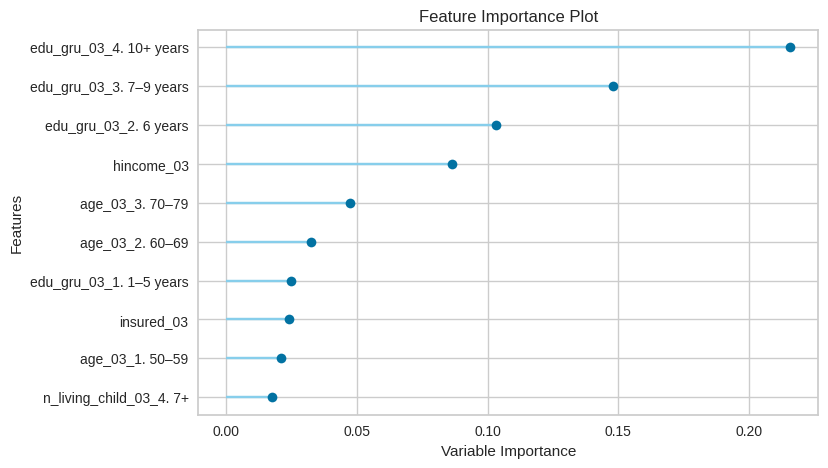

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'age_03_2. 60–69', 'edu_gru_03_1. 1–5 years', 'insured_03',
       'age_03_1. 50–59', 'n_living_child_03_4. 7+', 'sinc_pension_03',
       'hinc_business_03', 'hard_03', 'urban_03_1. 100,000+',
       'visit_dental_03', 'searnings_03', 'glob_hlth_03_3. Good',
       'rjob_hrswk_03', 'n_living_child_03_2. 3 or 4',
       'married_03_3. Widowed'],
      dtype='object') 

Ridge(random_state=1)


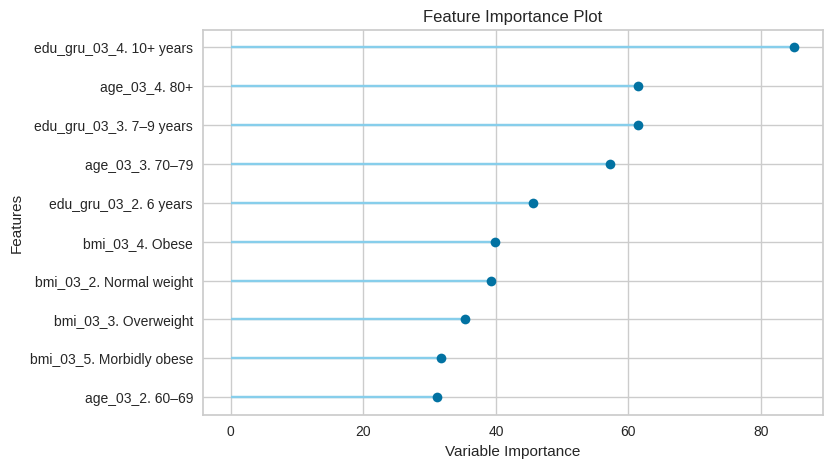

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'age_03_2. 60–69', 'edu_gru_03_1. 1–5 years', 'insured_03',
       'age_03_1. 50–59', 'n_living_child_03_4. 7+', 'sinc_pension_03',
       'hinc_business_03', 'hard_03', 'urban_03_1. 100,000+',
       'visit_dental_03', 'searnings_03', 'glob_hlth_03_3. Good',
       'rjob_hrswk_03', 'n_living_child_03_2. 3 or 4',
       'married_03_3. Widowed'],
      dtype='object') 

Lasso(random_state=1)


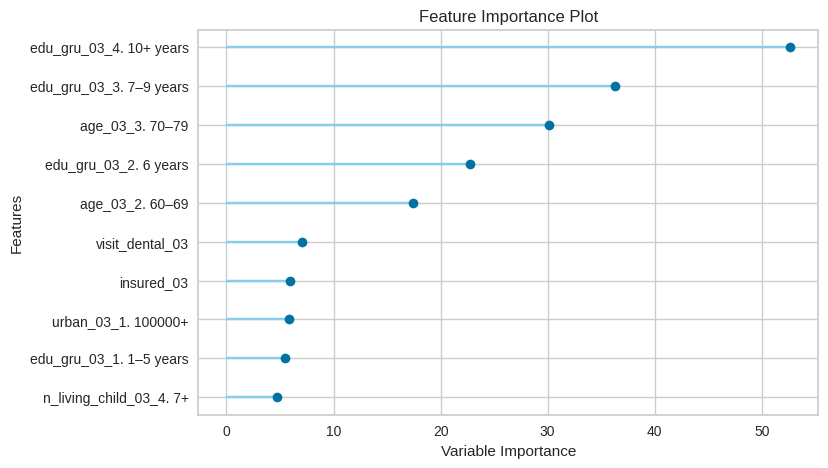

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'age_03_2. 60–69', 'edu_gru_03_1. 1–5 years', 'insured_03',
       'age_03_1. 50–59', 'n_living_child_03_4. 7+', 'sinc_pension_03',
       'hinc_business_03', 'hard_03', 'urban_03_1. 100,000+',
       'visit_dental_03', 'searnings_03', 'glob_hlth_03_3. Good',
       'rjob_hrswk_03', 'n_living_child_03_2. 3 or 4',
       'married_03_3. Widowed'],
      dtype='object') 

RandomForestRegressor(n_jobs=-1, random_state=1)


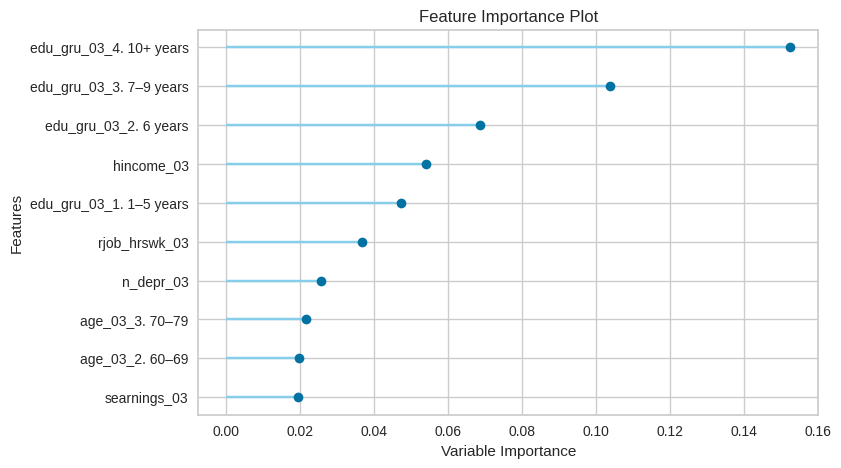

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'age_03_2. 60–69', 'edu_gru_03_1. 1–5 years', 'insured_03',
       'age_03_1. 50–59', 'n_living_child_03_4. 7+', 'sinc_pension_03',
       'hinc_business_03', 'hard_03', 'urban_03_1. 100,000+',
       'visit_dental_03', 'searnings_03', 'glob_hlth_03_3. Good',
       'rjob_hrswk_03', 'n_living_child_03_2. 3 or 4',
       'married_03_3. Widowed'],
      dtype='object') 

LassoLars(random_state=1)


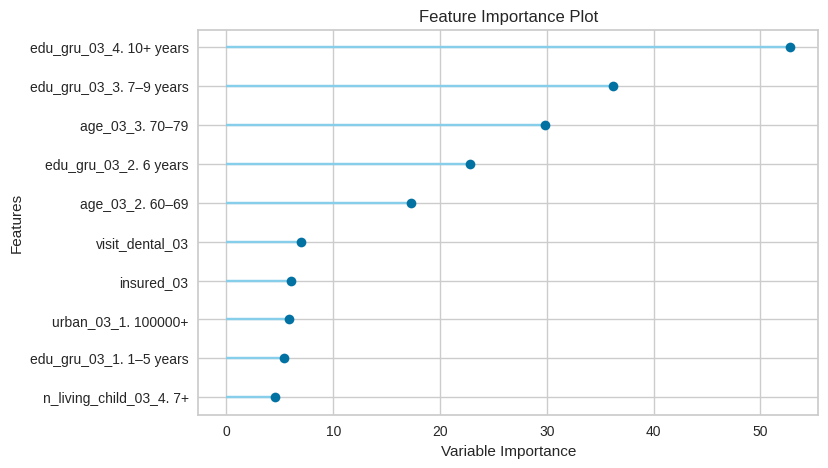

Top features by importance: Index(['edu_gru_03_4. 10+ years', 'edu_gru_03_3. 7–9 years',
       'edu_gru_03_2. 6 years', 'hincome_03', 'age_03_3. 70–79',
       'age_03_2. 60–69', 'edu_gru_03_1. 1–5 years', 'insured_03',
       'age_03_1. 50–59', 'n_living_child_03_4. 7+', 'sinc_pension_03',
       'hinc_business_03', 'hard_03', 'urban_03_1. 100,000+',
       'visit_dental_03', 'searnings_03', 'glob_hlth_03_3. Good',
       'rjob_hrswk_03', 'n_living_child_03_2. 3 or 4',
       'married_03_3. Widowed'],
      dtype='object') 

{'insured_03', 'age_03_2. 60–69', 'married_03_3. Widowed', 'hincome_03', 'urban_03_1. 100,000+', 'rjob_hrswk_03', 'sinc_pension_03', 'edu_gru_03_1. 1–5 years', 'glob_hlth_03_3. Good', 'age_03_1. 50–59', 'hinc_business_03', 'hard_03', 'visit_dental_03', 'edu_gru_03_3. 7–9 years', 'n_living_child_03_4. 7+', 'searnings_03', 'edu_gru_03_4. 10+ years', 'n_living_child_03_2. 3 or 4', 'age_03_3. 70–79', 'edu_gru_03_2. 6 years'}


In [25]:
s=setup(data_03_21, target = 'composite_score',fold=5,preprocess=False, index=False,session_id =1 )
bests = compare_models(exclude=['lightgbm'],n_select=5)
shapfeatures = []
for best_model in bests:
    try:
        interpret_model(best_model)
        print(best_model)
        print('============================================')
    except:
        continue
# plot feature importance
selectfeatures = []
for best in bests:
    try:
        print(best)
        plot_model(best, plot = 'feature')
        feature_importance = get_config('X_train').columns[bests[0].feature_importances_.argsort()[::-1]]
        print("Top features by importance:", feature_importance[:20],'\n')  # Adjust the number to display top N feature
        selectfeatures.append(feature_importance[:20])
    except:
        continue   
pycaret_features= set()
for i in selectfeatures:
    pycaret_features|= set(i)
print(pycaret_features)

##### Chi-square feature and P-value selection

In [26]:
Chi(data_03_21)

[{'name': 'hincome_03', 'chi2': 130929533.5839655, 'p-val': 0.0}, {'name': 'hinc_cap_03', 'chi2': 103988895.45561539, 'p-val': 0.0}, {'name': 'hinc_rent_03', 'chi2': 90168629.44802491, 'p-val': 0.0}, {'name': 'hinc_business_03', 'chi2': 87968195.9418034, 'p-val': 0.0}, {'name': 'rearnings_03', 'chi2': 50269761.46054298, 'p-val': 0.0}]


,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1872, 21)"
4,Transformed data shape,"(1872, 21)"
5,Transformed train set shape,"(1310, 21)"
6,Transformed test set shape,"(562, 21)"
7,Numeric features,20


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,32.9450,1797.0307,42.3352,0.4505,0.3936,0.3609,0.0120
lr,Linear Regression,32.9509,1799.6453,42.3634,0.4499,0.3934,0.3603,0.0100
br,Bayesian Ridge,32.9815,1800.0750,42.3719,0.4495,0.3944,0.3624,0.0120
gbr,Gradient Boosting Regressor,34.0601,1913.4684,43.6808,0.4148,0.4015,0.3731,0.0320
lasso,Lasso Regression,34.6349,1944.7899,44.0602,0.4039,0.4138,0.3917,0.0120
lar,Least Angle Regression,34.1332,1952.6625,44.0068,0.4032,0.4025,0.3546,0.0120
llar,Lasso Least Angle Regression,34.6623,1947.4125,44.0889,0.4031,0.4142,0.3922,0.0120
rf,Random Forest Regressor,35.4438,2130.0669,46.1214,0.3448,0.4147,0.3788,0.0800
ada,AdaBoost Regressor,37.1276,2180.5944,46.6660,0.3309,0.4255,0.4020,0.0280
en,Elastic Net,40.2685,2539.9481,50.3723,0.2207,0.4556,0.4543,0.0100


[Ridge(random_state=1),
 LinearRegression(n_jobs=-1),
 BayesianRidge(),
 GradientBoostingRegressor(random_state=1),
 Lasso(random_state=1),
 Lars(random_state=1),
 LassoLars(random_state=1),
 RandomForestRegressor(n_jobs=-1, random_state=1),
 AdaBoostRegressor(random_state=1),
 ElasticNet(random_state=1),
 ExtraTreesRegressor(n_jobs=-1, random_state=1),
 KNeighborsRegressor(n_jobs=-1),
 OrthogonalMatchingPursuit(),
 DummyRegressor(),
 DecisionTreeRegressor(random_state=1),
 HuberRegressor(),
 PassiveAggressiveRegressor(random_state=1)]

##### Predict 2016 result with 2012 survey

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1566, 154)"
4,Transformed data shape,"(1566, 154)"
5,Transformed train set shape,"(1096, 154)"
6,Transformed test set shape,"(470, 154)"
7,Numeric features,153


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,34.2520,1878.1728,43.2983,0.5739,0.4211,0.4031,0.0620
lasso,Lasso Regression,35.0658,1938.3145,43.9853,0.5606,0.4384,0.4343,0.0220
ridge,Ridge Regression,35.6057,2001.9495,44.7000,0.5452,0.4435,0.3989,0.0140
rf,Random Forest Regressor,35.4135,2016.9144,44.8636,0.5416,0.4344,0.4136,0.0620
llar,Lasso Least Angle Regression,36.7710,2121.2037,45.8934,0.5198,0.4568,0.4618,0.0140
lr,Linear Regression,36.6575,2129.3763,46.0573,0.5160,0.4442,0.4012,0.0140
ada,AdaBoost Regressor,37.9255,2210.2900,46.9648,0.4982,0.4492,0.4345,0.0460
br,Bayesian Ridge,39.0470,2397.8857,48.8563,0.4556,0.4863,0.4203,0.0180
en,Elastic Net,41.1962,2637.6755,51.3444,0.4027,0.4952,0.5279,0.0200
et,Extra Trees Regressor,44.2678,3176.8166,56.2398,0.2780,0.5284,0.4705,0.0700


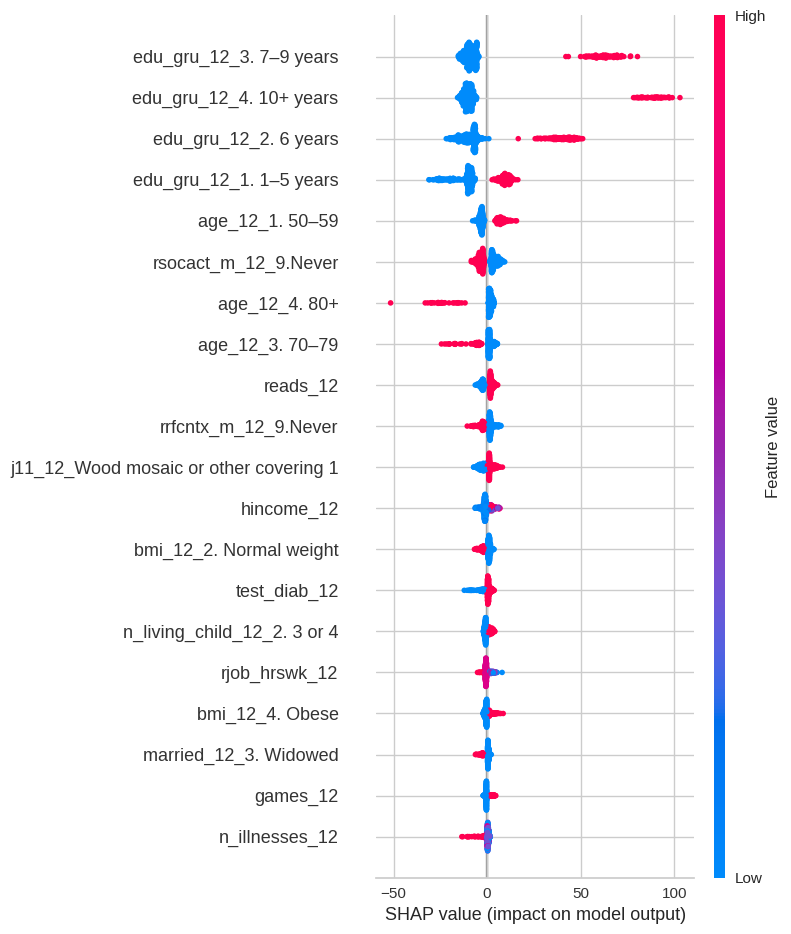

RandomForestRegressor(n_jobs=-1, random_state=1)
GradientBoostingRegressor(random_state=1)


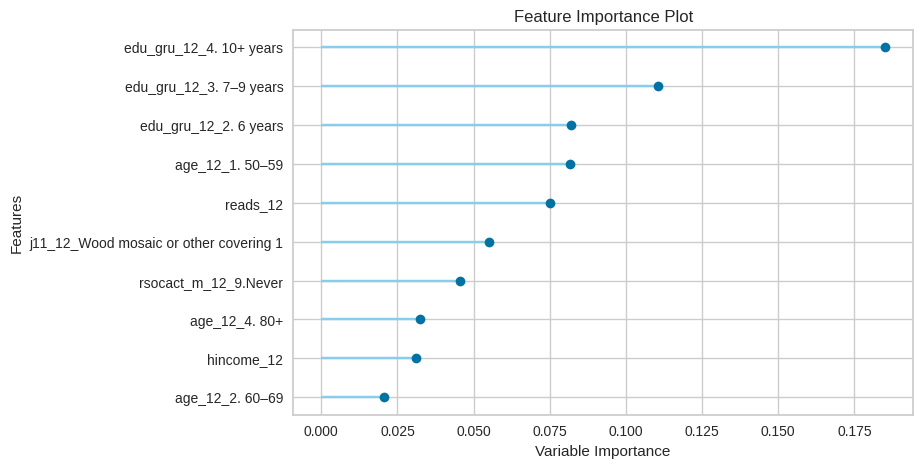

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'age_12_1. 50–59', 'reads_12',
       'j11_12_Wood, mosaic, or other covering 1', 'rsocact_m_12_9.Never',
       'age_12_4. 80+', 'hincome_12', 'age_12_2. 60–69', 'rjob_hrswk_12',
       'rrfcntx_m_12_9.Never', 'games_12', 'age_12_3. 70–79',
       'bmi_12_4. Obese', 'edu_gru_12_1. 1–5 years', 'bmi_12_2. Normal weight',
       'n_living_child_12_4. 7+', 'adl_walk_12', 'n_adl_12'],
      dtype='object') 

Lasso(random_state=1)


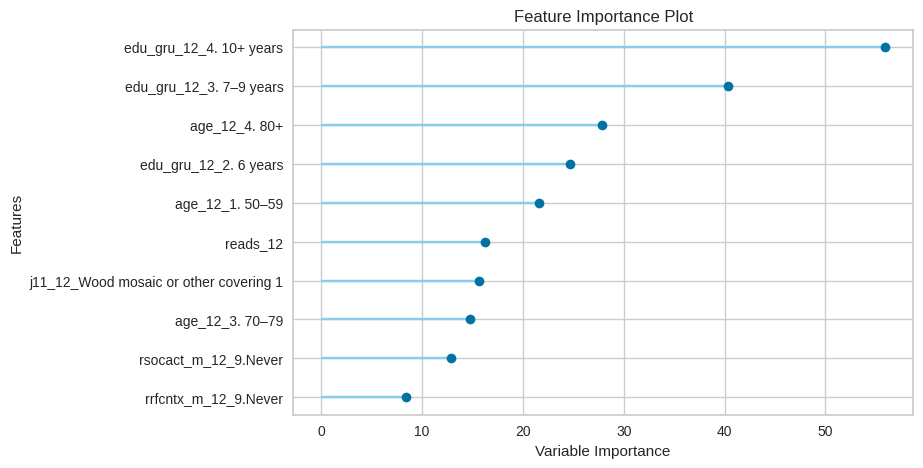

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'age_12_1. 50–59', 'reads_12',
       'j11_12_Wood, mosaic, or other covering 1', 'rsocact_m_12_9.Never',
       'age_12_4. 80+', 'hincome_12', 'age_12_2. 60–69', 'rjob_hrswk_12',
       'rrfcntx_m_12_9.Never', 'games_12', 'age_12_3. 70–79',
       'bmi_12_4. Obese', 'edu_gru_12_1. 1–5 years', 'bmi_12_2. Normal weight',
       'n_living_child_12_4. 7+', 'adl_walk_12', 'n_adl_12'],
      dtype='object') 

Ridge(random_state=1)


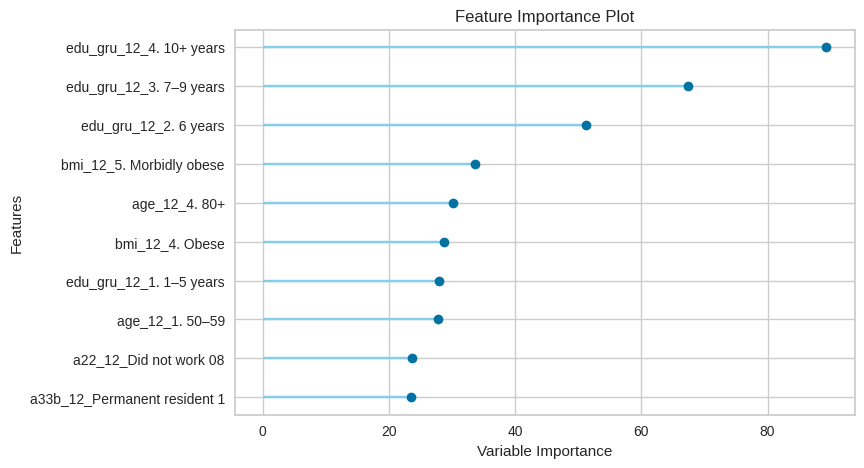

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'age_12_1. 50–59', 'reads_12',
       'j11_12_Wood, mosaic, or other covering 1', 'rsocact_m_12_9.Never',
       'age_12_4. 80+', 'hincome_12', 'age_12_2. 60–69', 'rjob_hrswk_12',
       'rrfcntx_m_12_9.Never', 'games_12', 'age_12_3. 70–79',
       'bmi_12_4. Obese', 'edu_gru_12_1. 1–5 years', 'bmi_12_2. Normal weight',
       'n_living_child_12_4. 7+', 'adl_walk_12', 'n_adl_12'],
      dtype='object') 

RandomForestRegressor(n_jobs=-1, random_state=1)


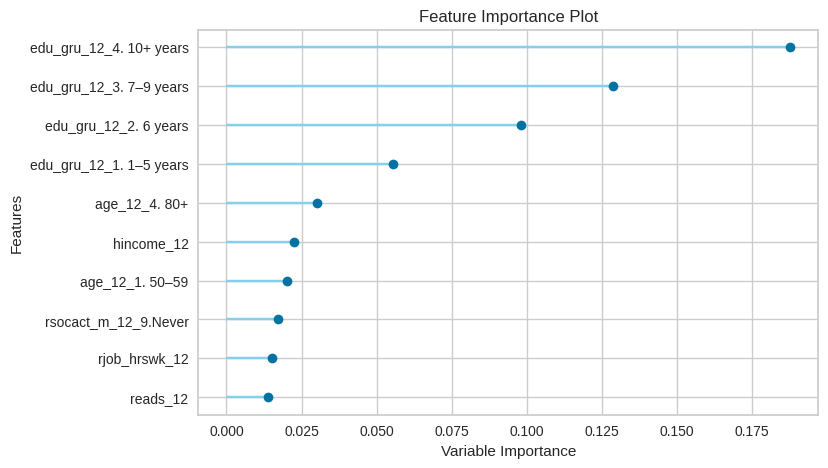

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'age_12_1. 50–59', 'reads_12',
       'j11_12_Wood, mosaic, or other covering 1', 'rsocact_m_12_9.Never',
       'age_12_4. 80+', 'hincome_12', 'age_12_2. 60–69', 'rjob_hrswk_12',
       'rrfcntx_m_12_9.Never', 'games_12', 'age_12_3. 70–79',
       'bmi_12_4. Obese', 'edu_gru_12_1. 1–5 years', 'bmi_12_2. Normal weight',
       'n_living_child_12_4. 7+', 'adl_walk_12', 'n_adl_12'],
      dtype='object') 

LassoLars(random_state=1)


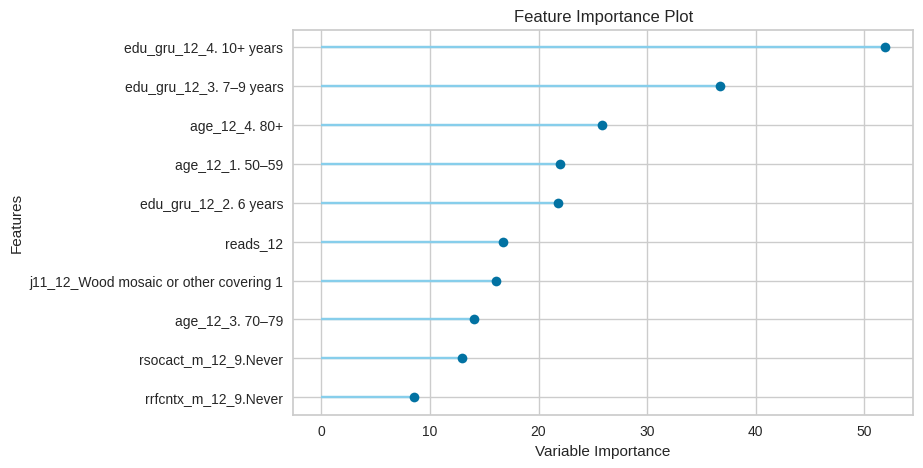

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'age_12_1. 50–59', 'reads_12',
       'j11_12_Wood, mosaic, or other covering 1', 'rsocact_m_12_9.Never',
       'age_12_4. 80+', 'hincome_12', 'age_12_2. 60–69', 'rjob_hrswk_12',
       'rrfcntx_m_12_9.Never', 'games_12', 'age_12_3. 70–79',
       'bmi_12_4. Obese', 'edu_gru_12_1. 1–5 years', 'bmi_12_2. Normal weight',
       'n_living_child_12_4. 7+', 'adl_walk_12', 'n_adl_12'],
      dtype='object') 

{'bmi_12_4. Obese', 'j11_12_Wood, mosaic, or other covering 1', 'games_12', 'bmi_12_2. Normal weight', 'reads_12', 'edu_gru_12_3. 7–9 years', 'age_12_4. 80+', 'edu_gru_12_2. 6 years', 'edu_gru_12_1. 1–5 years', 'age_12_1. 50–59', 'n_adl_12', 'hincome_12', 'age_12_3. 70–79', 'rjob_hrswk_12', 'edu_gru_12_4. 10+ years', 'age_12_2. 60–69', 'rrfcntx_m_12_9.Never', 'rsocact_m_12_9.Never', 'n_living_child_12_4. 7+', 'adl_walk_12'}


In [27]:
s=setup(data_12_16, target = 'composite_score',fold=5,preprocess=False, index=False,session_id =1 )
bests = compare_models(exclude=['lightgbm'],n_select=5)
shapfeatures = []
for best_model in bests:
    try:
        interpret_model(best_model)
        print(best_model)
        print('============================================')
    except:
        continue
# plot feature importance
selectfeatures = []
for best in bests:
    try:
        print(best)
        plot_model(best, plot = 'feature')
        feature_importance = get_config('X_train').columns[bests[0].feature_importances_.argsort()[::-1]]
        print("Top features by importance:", feature_importance[:20],'\n')  # Adjust the number to display top N feature
        selectfeatures.append(feature_importance[:20])
    except:
        continue   
pycaret_features= set()
for i in selectfeatures:
    pycaret_features|= set(i)
print(pycaret_features)

##### Chi-square feature and P-value selection

In [28]:
Chi(data_12_16)

[{'name': 'hincome_12', 'chi2': 412894225.6270287, 'p-val': 0.0}, {'name': 'hinc_business_12', 'chi2': 292620635.2273249, 'p-val': 0.0}, {'name': 'hinc_cap_12', 'chi2': 279499307.9238185, 'p-val': 0.0}, {'name': 'hinc_rent_12', 'chi2': 166230710.10941714, 'p-val': 0.0}, {'name': 'rearnings_12', 'chi2': 120863863.65087906, 'p-val': 0.0}]


,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(1566, 21)"
4,Transformed data shape,"(1566, 21)"
5,Transformed train set shape,"(1096, 21)"
6,Transformed test set shape,"(470, 21)"
7,Numeric features,20


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,33.5825,1781.2098,42.1178,0.5954,0.4134,0.3891,0.0120
lr,Linear Regression,33.5822,1782.2093,42.1270,0.5951,0.4132,0.3875,0.0120
br,Bayesian Ridge,33.5963,1782.9192,42.1409,0.5951,0.4139,0.3904,0.0120
gbr,Gradient Boosting Regressor,34.5593,1902.7049,43.5666,0.5683,0.4180,0.3965,0.0300
lasso,Lasso Regression,34.8555,1922.8576,43.7741,0.5640,0.4390,0.4334,0.0120
llar,Lasso Least Angle Regression,34.8673,1924.3282,43.7913,0.5636,0.4391,0.4335,0.0120
rf,Random Forest Regressor,35.8277,2081.9181,45.6034,0.5272,0.4292,0.4003,0.0760
ada,AdaBoost Regressor,37.5991,2180.1571,46.6413,0.5048,0.4455,0.4263,0.0260
en,Elastic Net,42.6292,2824.2105,53.1219,0.3603,0.5113,0.5571,0.0100
et,Extra Trees Regressor,41.4185,2878.0752,53.6264,0.3481,0.5037,0.4394,0.0540


[Ridge(random_state=1),
 LinearRegression(n_jobs=-1),
 BayesianRidge(),
 GradientBoostingRegressor(random_state=1),
 Lasso(random_state=1),
 LassoLars(random_state=1),
 RandomForestRegressor(n_jobs=-1, random_state=1),
 AdaBoostRegressor(random_state=1),
 ElasticNet(random_state=1),
 ExtraTreesRegressor(n_jobs=-1, random_state=1),
 KNeighborsRegressor(n_jobs=-1),
 DecisionTreeRegressor(random_state=1),
 OrthogonalMatchingPursuit(),
 DummyRegressor(),
 HuberRegressor(),
 PassiveAggressiveRegressor(random_state=1),
 Lars(random_state=1)]

##### Predict 2021 result with 2012 survey

,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(2668, 154)"
4,Transformed data shape,"(2668, 154)"
5,Transformed train set shape,"(1867, 154)"
6,Transformed test set shape,"(801, 154)"
7,Numeric features,153


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,32.6170,1715.6869,41.4165,0.4847,0.3606,0.3158,0.1120
ridge,Ridge Regression,32.6329,1725.8268,41.5334,0.4821,0.3558,0.3078,0.0340
rf,Random Forest Regressor,33.2028,1748.9787,41.7965,0.4758,0.3624,0.3207,0.1040
lasso,Lasso Regression,33.4827,1790.5720,42.2965,0.4631,0.3717,0.3336,0.0420
lr,Linear Regression,34.0858,1873.8112,43.1926,0.4377,0.3688,0.3237,0.0340
llar,Lasso Least Angle Regression,34.7740,1920.6243,43.7579,0.4263,0.3823,0.3484,0.0340
ada,AdaBoost Regressor,34.9846,1927.5332,43.8757,0.4229,0.3767,0.3356,0.0840
en,Elastic Net,37.6783,2210.8397,46.9953,0.3378,0.4048,0.3810,0.0420
omp,Orthogonal Matching Pursuit,38.7053,2393.6987,48.8290,0.2819,0.4080,0.3797,0.0340
br,Bayesian Ridge,40.1233,2635.8111,50.9322,0.2152,0.4680,0.3512,0.0360


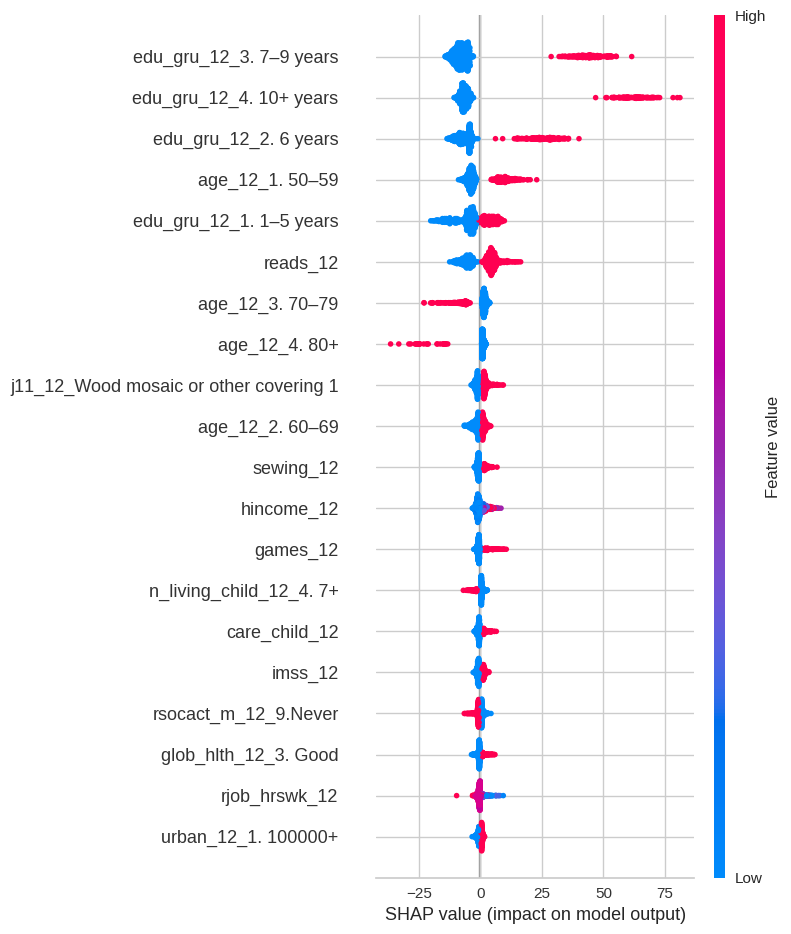

RandomForestRegressor(n_jobs=-1, random_state=1)
GradientBoostingRegressor(random_state=1)


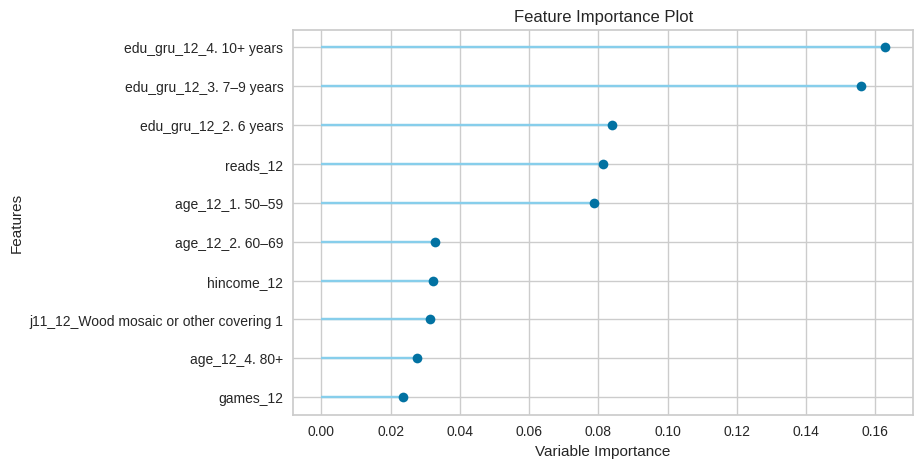

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'reads_12', 'age_12_1. 50–59',
       'age_12_2. 60–69', 'hincome_12',
       'j11_12_Wood, mosaic, or other covering 1', 'age_12_4. 80+', 'games_12',
       'n_living_child_12_4. 7+', 'sewing_12', 'age_12_3. 70–79',
       'n_living_child_12_3. 5 or 6', 'rsocact_m_12_9.Never', 'rjob_hrswk_12',
       'imss_12', 'edu_gru_12_1. 1–5 years', 'n_iadl_12', 'rearnings_12'],
      dtype='object') 

Ridge(random_state=1)


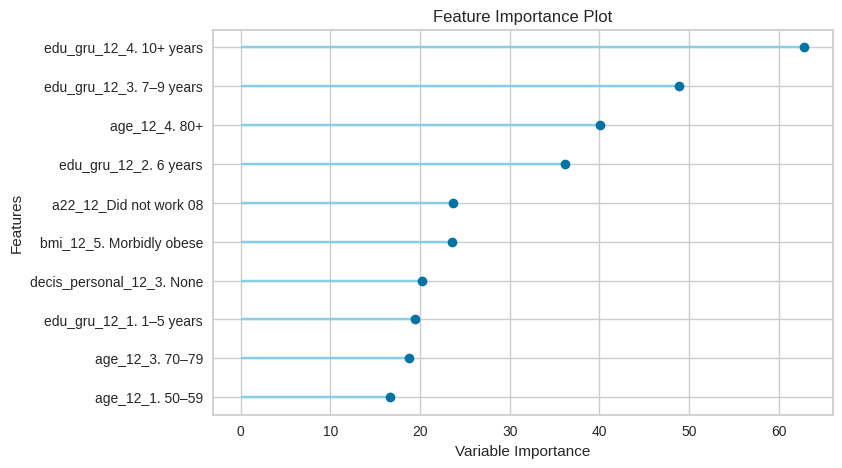

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'reads_12', 'age_12_1. 50–59',
       'age_12_2. 60–69', 'hincome_12',
       'j11_12_Wood, mosaic, or other covering 1', 'age_12_4. 80+', 'games_12',
       'n_living_child_12_4. 7+', 'sewing_12', 'age_12_3. 70–79',
       'n_living_child_12_3. 5 or 6', 'rsocact_m_12_9.Never', 'rjob_hrswk_12',
       'imss_12', 'edu_gru_12_1. 1–5 years', 'n_iadl_12', 'rearnings_12'],
      dtype='object') 

RandomForestRegressor(n_jobs=-1, random_state=1)


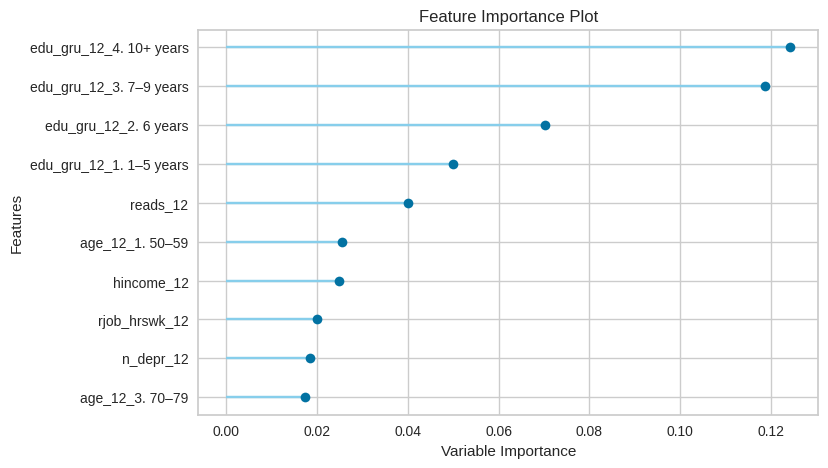

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'reads_12', 'age_12_1. 50–59',
       'age_12_2. 60–69', 'hincome_12',
       'j11_12_Wood, mosaic, or other covering 1', 'age_12_4. 80+', 'games_12',
       'n_living_child_12_4. 7+', 'sewing_12', 'age_12_3. 70–79',
       'n_living_child_12_3. 5 or 6', 'rsocact_m_12_9.Never', 'rjob_hrswk_12',
       'imss_12', 'edu_gru_12_1. 1–5 years', 'n_iadl_12', 'rearnings_12'],
      dtype='object') 

Lasso(random_state=1)


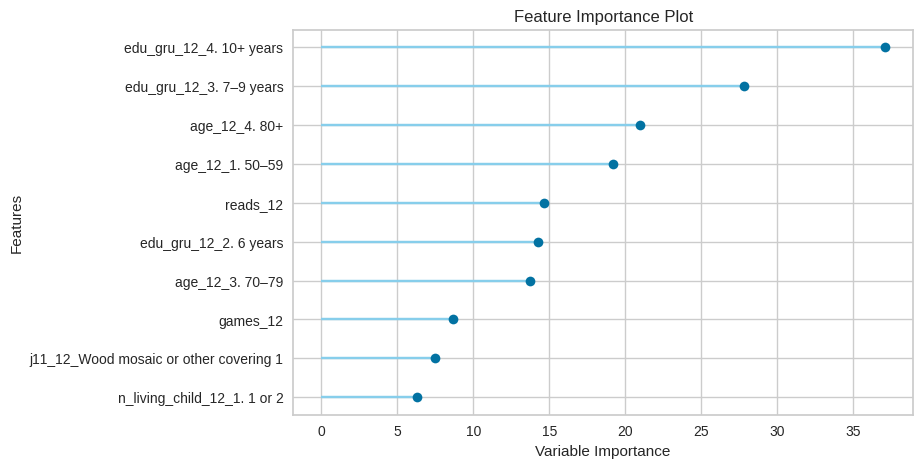

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'reads_12', 'age_12_1. 50–59',
       'age_12_2. 60–69', 'hincome_12',
       'j11_12_Wood, mosaic, or other covering 1', 'age_12_4. 80+', 'games_12',
       'n_living_child_12_4. 7+', 'sewing_12', 'age_12_3. 70–79',
       'n_living_child_12_3. 5 or 6', 'rsocact_m_12_9.Never', 'rjob_hrswk_12',
       'imss_12', 'edu_gru_12_1. 1–5 years', 'n_iadl_12', 'rearnings_12'],
      dtype='object') 

LinearRegression(n_jobs=-1)


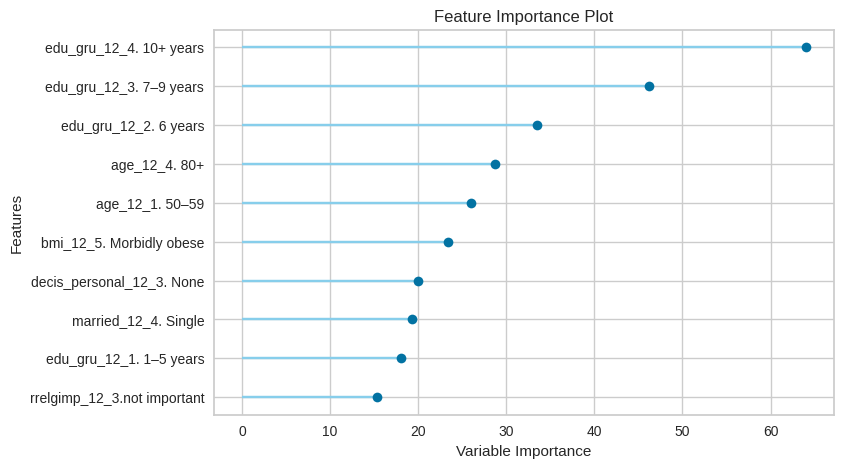

Top features by importance: Index(['edu_gru_12_4. 10+ years', 'edu_gru_12_3. 7–9 years',
       'edu_gru_12_2. 6 years', 'reads_12', 'age_12_1. 50–59',
       'age_12_2. 60–69', 'hincome_12',
       'j11_12_Wood, mosaic, or other covering 1', 'age_12_4. 80+', 'games_12',
       'n_living_child_12_4. 7+', 'sewing_12', 'age_12_3. 70–79',
       'n_living_child_12_3. 5 or 6', 'rsocact_m_12_9.Never', 'rjob_hrswk_12',
       'imss_12', 'edu_gru_12_1. 1–5 years', 'n_iadl_12', 'rearnings_12'],
      dtype='object') 

{'imss_12', 'rearnings_12', 'j11_12_Wood, mosaic, or other covering 1', 'n_iadl_12', 'sewing_12', 'games_12', 'reads_12', 'edu_gru_12_3. 7–9 years', 'age_12_4. 80+', 'edu_gru_12_2. 6 years', 'edu_gru_12_1. 1–5 years', 'age_12_1. 50–59', 'n_living_child_12_3. 5 or 6', 'hincome_12', 'age_12_3. 70–79', 'rjob_hrswk_12', 'edu_gru_12_4. 10+ years', 'age_12_2. 60–69', 'rsocact_m_12_9.Never', 'n_living_child_12_4. 7+'}


In [29]:
s=setup(data_12_21, target = 'composite_score',fold=5,preprocess=False, index=False,session_id =1 )
bests = compare_models(exclude=['lightgbm'],n_select=5)
shapfeatures = []
for best_model in bests:
    try:
        interpret_model(best_model)
        print(best_model)
        print('============================================')
    except:
        continue
# plot feature importance
selectfeatures = []
for best in bests:
    try:
        print(best)
        plot_model(best, plot = 'feature')
        feature_importance = get_config('X_train').columns[bests[0].feature_importances_.argsort()[::-1]]
        print("Top features by importance:", feature_importance[:20],'\n')  # Adjust the number to display top N feature
        selectfeatures.append(feature_importance[:20])
    except:
        continue   
pycaret_features= set()
for i in selectfeatures:
    pycaret_features|= set(i)
print(pycaret_features)

##### Chi-square feature and P-value selection

In [30]:
Chi(data_12_21)

[{'name': 'hinc_business_12', 'chi2': 2650795863.186606, 'p-val': 0.0}, {'name': 'hinc_cap_12', 'chi2': 2503373392.3606386, 'p-val': 0.0}, {'name': 'hincome_12', 'chi2': 1220260303.3174675, 'p-val': 0.0}, {'name': 'hinc_rent_12', 'chi2': 504060902.97126454, 'p-val': 0.0}, {'name': 'rearnings_12', 'chi2': 165491427.56251386, 'p-val': 0.0}]


,Description,Value
0,Session id,1
1,Target,composite_score
2,Target type,Regression
3,Original data shape,"(2668, 21)"
4,Transformed data shape,"(2668, 21)"
5,Transformed train set shape,"(1867, 21)"
6,Transformed test set shape,"(801, 21)"
7,Numeric features,20


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,31.7368,1625.3711,40.3004,0.5127,0.3491,0.3033,0.0120
ridge,Ridge Regression,31.7450,1625.8119,40.3054,0.5126,0.3493,0.3038,0.0120
br,Bayesian Ridge,31.7563,1625.9776,40.3081,0.5125,0.3496,0.3044,0.0120
gbr,Gradient Boosting Regressor,32.5849,1715.4314,41.4045,0.4860,0.3578,0.3127,0.0340
llar,Lasso Least Angle Regression,33.4010,1764.6854,41.9945,0.4710,0.3718,0.3345,0.0120
lasso,Lasso Regression,33.4010,1764.6854,41.9945,0.4710,0.3718,0.3345,0.0120
ada,AdaBoost Regressor,34.5284,1889.8656,43.4648,0.4328,0.3766,0.3359,0.0340
rf,Random Forest Regressor,35.1067,1968.7963,44.3635,0.4095,0.3772,0.3298,0.0700
en,Elastic Net,38.9993,2351.2278,48.4637,0.2959,0.4162,0.3977,0.0120
lar,Least Angle Regression,33.6552,2431.2343,47.8732,0.2870,0.3720,0.3167,0.0120


[LinearRegression(n_jobs=-1),
 Ridge(random_state=1),
 BayesianRidge(),
 GradientBoostingRegressor(random_state=1),
 LassoLars(random_state=1),
 Lasso(random_state=1),
 AdaBoostRegressor(random_state=1),
 RandomForestRegressor(n_jobs=-1, random_state=1),
 ElasticNet(random_state=1),
 Lars(random_state=1),
 ExtraTreesRegressor(n_jobs=-1, random_state=1),
 KNeighborsRegressor(n_jobs=-1),
 OrthogonalMatchingPursuit(),
 DummyRegressor(),
 DecisionTreeRegressor(random_state=1),
 HuberRegressor(),
 PassiveAggressiveRegressor(random_state=1)]